In [ ]:
#import desired packages#import
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import sys
# library for freezing the graph
from tensorflow.python.tools import freeze_graph
# library for optmising inference
from tensorflow.python.tools import optimize_for_inference_lib
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#CSV_COLUMN_NAMES = ['android.permission.ACCESS_ALL_DOWNLOADS', 'android.permission.ACCESS_BLUETOOTH_SHARE', 'android.permission.ACCESS_CACHE_FILESYSTEM', 'android.permission.ACCESS_CHECKIN_PROPERTIES', 'android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY', 'android.permission.ACCESS_DOWNLOAD_MANAGER', 'android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED', 'android.permission.ACCESS_DRM_CERTIFICATES', 'android.permission.ACCESS_EPHEMERAL_APPS', 'android.permission.ACCESS_FM_RADIO', 'android.permission.ACCESS_INPUT_FLINGER', 'android.permission.ACCESS_KEYGUARD_SECURE_STORAGE', 'android.permission.ACCESS_LOCATION_EXTRA_COMMANDS', 'android.permission.ACCESS_MOCK_LOCATION', 'android.permission.ACCESS_MTP', 'android.permission.ACCESS_NETWORK_CONDITIONS', 'android.permission.ACCESS_NETWORK_STATE', 'android.permission.ACCESS_NOTIFICATIONS', 'android.permission.ACCESS_NOTIFICATION_POLICY', 'android.permission.ACCESS_PDB_STATE', 'android.permission.ACCESS_SURFACE_FLINGER', 'android.permission.ACCESS_VOICE_INTERACTION_SERVICE', 'android.permission.ACCESS_VR_MANAGER', 'android.permission.ACCESS_WIFI_STATE', 'android.permission.ACCESS_WIMAX_STATE', 'android.permission.ACCOUNT_MANAGER', 'android.permission.ALLOW_ANY_CODEC_FOR_PLAYBACK', 'android.permission.ASEC_ACCESS', 'android.permission.ASEC_CREATE', 'android.permission.ASEC_DESTROY', 'android.permission.ASEC_MOUNT_UNMOUNT', 'android.permission.ASEC_RENAME', 'android.permission.AUTHENTICATE_ACCOUNTS', 'android.permission.BACKUP', 'android.permission.BATTERY_STATS', 'android.permission.BIND_ACCESSIBILITY_SERVICE', 'android.permission.BIND_APPWIDGET', 'android.permission.BIND_CARRIER_MESSAGING_SERVICE', 'android.permission.BIND_CARRIER_SERVICES', 'android.permission.BIND_CHOOSER_TARGET_SERVICE', 'android.permission.BIND_CONDITION_PROVIDER_SERVICE', 'android.permission.BIND_CONNECTION_SERVICE', 'android.permission.BIND_DEVICE_ADMIN', 'android.permission.BIND_DIRECTORY_SEARCH', 'android.permission.BIND_DREAM_SERVICE', 'android.permission.BIND_INCALL_SERVICE', 'android.permission.BIND_INPUT_METHOD', 'android.permission.BIND_INTENT_FILTER_VERIFIER', 'android.permission.BIND_JOB_SERVICE', 'android.permission.BIND_KEYGUARD_APPWIDGET', 'android.permission.BIND_MIDI_DEVICE_SERVICE', 'android.permission.BIND_NFC_SERVICE', 'android.permission.BIND_NOTIFICATION_LISTENER_SERVICE', 'android.permission.BIND_NOTIFICATION_RANKER_SERVICE', 'android.permission.BIND_PACKAGE_VERIFIER', 'android.permission.BIND_PRINT_RECOMMENDATION_SERVICE', 'android.permission.BIND_PRINT_SERVICE', 'android.permission.BIND_PRINT_SPOOLER_SERVICE', 'android.permission.BIND_QUICK_SETTINGS_TILE', 'android.permission.BIND_REMOTEVIEWS', 'android.permission.BIND_REMOTE_DISPLAY', 'android.permission.BIND_ROUTE_PROVIDER', 'android.permission.BIND_RUNTIME_PERMISSION_PRESENTER_SERVICE', 'android.permission.BIND_SCREENING_SERVICE', 'android.permission.BIND_TELECOM_CONNECTION_SERVICE', 'android.permission.BIND_TEXT_SERVICE', 'android.permission.BIND_TRUST_AGENT', 'android.permission.BIND_TV_INPUT', 'android.permission.BIND_TV_REMOTE_SERVICE', 'android.permission.BIND_VOICE_INTERACTION', 'android.permission.BIND_VPN_SERVICE', 'android.permission.BIND_VR_LISTENER_SERVICE', 'android.permission.BIND_WALLPAPER', 'android.permission.BLUETOOTH', 'android.permission.BLUETOOTH_ADMIN', 'android.permission.BLUETOOTH_MAP', 'android.permission.BLUETOOTH_PRIVILEGED', 'android.permission.BLUETOOTH_STACK', 'android.permission.BRICK', 'android.permission.BROADCAST_CALLLOG_INFO', 'android.permission.BROADCAST_NETWORK_PRIVILEGED', 'android.permission.BROADCAST_PACKAGE_REMOVED', 'android.permission.BROADCAST_PHONE_ACCOUNT_REGISTRATION', 'android.permission.BROADCAST_SMS', 'android.permission.BROADCAST_STICKY', 'android.permission.BROADCAST_WAP_PUSH', 'android.permission.CACHE_CONTENT', 'android.permission.CALL_PRIVILEGED', 'android.permission.CAMERA_DISABLE_TRANSMIT_LED', 'android.permission.CAMERA_SEND_SYSTEM_EVENTS', 'android.permission.CAPTURE_AUDIO_HOTWORD', 'android.permission.CAPTURE_AUDIO_OUTPUT', 'android.permission.CAPTURE_SECURE_VIDEO_OUTPUT', 'android.permission.CAPTURE_TV_INPUT', 'android.permission.CAPTURE_VIDEO_OUTPUT', 'android.permission.CARRIER_FILTER_SMS', 'android.permission.CHANGE_APP_IDLE_STATE', 'android.permission.CHANGE_BACKGROUND_DATA_SETTING', 'android.permission.CHANGE_COMPONENT_ENABLED_STATE', 'android.permission.CHANGE_CONFIGURATION', 'android.permission.CHANGE_DEVICE_IDLE_TEMP_WHITELIST', 'android.permission.CHANGE_NETWORK_STATE', 'android.permission.CHANGE_WIFI_MULTICAST_STATE', 'android.permission.CHANGE_WIFI_STATE', 'android.permission.CHANGE_WIMAX_STATE', 'android.permission.CLEAR_APP_CACHE', 'android.permission.CLEAR_APP_GRANTED_URI_PERMISSIONS', 'android.permission.CLEAR_APP_USER_DATA', 'android.permission.CONFIGURE_DISPLAY_COLOR_TRANSFORM', 'android.permission.CONFIGURE_WIFI_DISPLAY', 'android.permission.CONFIRM_FULL_BACKUP', 'android.permission.CONNECTIVITY_INTERNAL', 'android.permission.CONTROL_INCALL_EXPERIENCE', 'android.permission.CONTROL_KEYGUARD', 'android.permission.CONTROL_LOCATION_UPDATES', 'android.permission.CONTROL_VPN', 'android.permission.CONTROL_WIFI_DISPLAY', 'android.permission.COPY_PROTECTED_DATA', 'android.permission.CREATE_USERS', 'android.permission.CRYPT_KEEPER', 'android.permission.DELETE_CACHE_FILES', 'android.permission.DELETE_PACKAGES', 'android.permission.DEVICE_POWER', 'android.permission.DIAGNOSTIC', 'android.permission.DISABLE_KEYGUARD', 'android.permission.DISPATCH_NFC_MESSAGE', 'android.permission.DISPATCH_PROVISIONING_MESSAGE', 'android.permission.DOWNLOAD_CACHE_NON_PURGEABLE', 'android.permission.DUMP', 'android.permission.DVB_DEVICE', 'android.permission.EXPAND_STATUS_BAR', 'android.permission.FACTORY_TEST', 'android.permission.FILTER_EVENTS', 'android.permission.FLASHLIGHT', 'android.permission.FORCE_BACK', 'android.permission.FORCE_STOP_PACKAGES', 'android.permission.FRAME_STATS', 'android.permission.FREEZE_SCREEN', 'android.permission.GET_ACCOUNTS_PRIVILEGED', 'android.permission.GET_APP_GRANTED_URI_PERMISSIONS', 'android.permission.GET_APP_OPS_STATS', 'android.permission.GET_DETAILED_TASKS', 'android.permission.GET_INTENT_SENDER_INTENT', 'android.permission.GET_PACKAGE_IMPORTANCE', 'android.permission.GET_PACKAGE_SIZE', 'android.permission.GET_PASSWORD', 'android.permission.GET_PROCESS_STATE_AND_OOM_SCORE', 'android.permission.GET_TASKS', 'android.permission.GET_TOP_ACTIVITY_INFO', 'android.permission.GLOBAL_SEARCH', 'android.permission.GLOBAL_SEARCH_CONTROL', 'android.permission.GRANT_RUNTIME_PERMISSIONS', 'android.permission.HARDWARE_TEST', 'android.permission.HDMI_CEC', 'android.permission.INJECT_EVENTS', 'android.permission.INSTALL_GRANT_RUNTIME_PERMISSIONS', 'android.permission.INSTALL_LOCATION_PROVIDER', 'android.permission.INSTALL_PACKAGES', 'android.permission.INTENT_FILTER_VERIFICATION_AGENT', 'android.permission.INTERACT_ACROSS_USERS', 'android.permission.INTERACT_ACROSS_USERS_FULL', 'android.permission.INTERNAL_SYSTEM_WINDOW', 'android.permission.INTERNET', 'android.permission.INVOKE_CARRIER_SETUP', 'android.permission.KILL_BACKGROUND_PROCESSES', 'android.permission.KILL_UID', 'android.permission.LAUNCH_TRUST_AGENT_SETTINGS', 'android.permission.LOCAL_MAC_ADDRESS', 'android.permission.LOCATION_HARDWARE', 'android.permission.LOOP_RADIO', 'android.permission.MANAGE_ACCOUNTS', 'android.permission.MANAGE_ACTIVITY_STACKS', 'android.permission.MANAGE_APP_OPS_RESTRICTIONS', 'android.permission.MANAGE_APP_TOKENS', 'android.permission.MANAGE_CA_CERTIFICATES', 'android.permission.MANAGE_DEVICE_ADMINS', 'android.permission.MANAGE_DOCUMENTS', 'android.permission.MANAGE_FINGERPRINT', 'android.permission.MANAGE_MEDIA_PROJECTION', 'android.permission.MANAGE_NETWORK_POLICY', 'android.permission.MANAGE_NOTIFICATIONS', 'android.permission.MANAGE_PROFILE_AND_DEVICE_OWNERS', 'android.permission.MANAGE_SOUND_TRIGGER', 'android.permission.MANAGE_USB', 'android.permission.MANAGE_USERS', 'android.permission.MANAGE_VOICE_KEYPHRASES', 'android.permission.MASTER_CLEAR', 'android.permission.MEDIA_CONTENT_CONTROL', 'android.permission.MODIFY_APPWIDGET_BIND_PERMISSIONS', 'android.permission.MODIFY_AUDIO_ROUTING', 'android.permission.MODIFY_AUDIO_SETTINGS', 'android.permission.MODIFY_CELL_BROADCASTS', 'android.permission.MODIFY_DAY_NIGHT_MODE', 'android.permission.MODIFY_NETWORK_ACCOUNTING', 'android.permission.MODIFY_PARENTAL_CONTROLS', 'android.permission.MODIFY_PHONE_STATE', 'android.permission.MOUNT_FORMAT_FILESYSTEMS', 'android.permission.MOUNT_UNMOUNT_FILESYSTEMS', 'android.permission.MOVE_PACKAGE', 'android.permission.NET_ADMIN', 'android.permission.NET_TUNNELING', 'android.permission.NFC', 'android.permission.NFC_HANDOVER_STATUS', 'android.permission.NOTIFY_PENDING_SYSTEM_UPDATE', 'android.permission.OBSERVE_GRANT_REVOKE_PERMISSIONS', 'android.permission.OEM_UNLOCK_STATE', 'android.permission.OVERRIDE_WIFI_CONFIG', 'android.permission.PACKAGE_USAGE_STATS', 'android.permission.PACKAGE_VERIFICATION_AGENT', 'android.permission.PACKET_KEEPALIVE_OFFLOAD', 'android.permission.PEERS_MAC_ADDRESS', 'android.permission.PERFORM_CDMA_PROVISIONING', 'android.permission.PERFORM_SIM_ACTIVATION', 'android.permission.PERSISTENT_ACTIVITY', 'android.permission.PROCESS_CALLLOG_INFO', 'android.permission.PROCESS_PHONE_ACCOUNT_REGISTRATION', 'android.permission.PROVIDE_TRUST_AGENT', 'android.permission.QUERY_DO_NOT_ASK_CREDENTIALS_ON_BOOT', 'android.permission.READ_BLOCKED_NUMBERS', 'android.permission.READ_DREAM_STATE', 'android.permission.READ_FRAME_BUFFER', 'android.permission.READ_INPUT_STATE', 'android.permission.READ_INSTALL_SESSIONS', 'android.permission.READ_LOGS', 'android.permission.READ_NETWORK_USAGE_HISTORY', 'android.permission.READ_OEM_UNLOCK_STATE', 'android.permission.READ_PRECISE_PHONE_STATE', 'android.permission.READ_PRIVILEGED_PHONE_STATE', 'android.permission.READ_PROFILE', 'android.permission.READ_SEARCH_INDEXABLES', 'android.permission.READ_SOCIAL_STREAM', 'android.permission.READ_SYNC_SETTINGS', 'android.permission.READ_SYNC_STATS', 'android.permission.READ_USER_DICTIONARY', 'android.permission.READ_WIFI_CREDENTIAL', 'android.permission.REAL_GET_TASKS', 'android.permission.REBOOT', 'android.permission.RECEIVE_BLUETOOTH_MAP', 'android.permission.RECEIVE_BOOT_COMPLETED', 'android.permission.RECEIVE_DATA_ACTIVITY_CHANGE', 'android.permission.RECEIVE_EMERGENCY_BROADCAST', 'android.permission.RECEIVE_MEDIA_RESOURCE_USAGE', 'android.permission.RECEIVE_STK_COMMANDS', 'android.permission.RECEIVE_WIFI_CREDENTIAL_CHANGE', 'android.permission.RECOVERY', 'android.permission.REGISTER_CALL_PROVIDER', 'android.permission.REGISTER_CONNECTION_MANAGER', 'android.permission.REGISTER_SIM_SUBSCRIPTION', 'android.permission.REGISTER_WINDOW_MANAGER_LISTENERS', 'android.permission.REMOTE_AUDIO_PLAYBACK', 'android.permission.REMOVE_DRM_CERTIFICATES', 'android.permission.REMOVE_TASKS', 'android.permission.REORDER_TASKS', 'android.permission.REQUEST_IGNORE_BATTERY_OPTIMIZATIONS', 'android.permission.REQUEST_INSTALL_PACKAGES', 'android.permission.RESET_FINGERPRINT_LOCKOUT', 'android.permission.RESET_SHORTCUT_MANAGER_THROTTLING', 'android.permission.RESTART_PACKAGES', 'android.permission.RETRIEVE_WINDOW_CONTENT', 'android.permission.RETRIEVE_WINDOW_TOKEN', 'android.permission.REVOKE_RUNTIME_PERMISSIONS', 'android.permission.SCORE_NETWORKS', 'android.permission.SEND_CALL_LOG_CHANGE', 'android.permission.SEND_DOWNLOAD_COMPLETED_INTENTS', 'android.permission.SEND_RESPOND_VIA_MESSAGE', 'android.permission.SEND_SMS_NO_CONFIRMATION', 'android.permission.SERIAL_PORT', 'android.permission.SET_ACTIVITY_WATCHER', 'android.permission.SET_ALWAYS_FINISH', 'android.permission.SET_ANIMATION_SCALE', 'android.permission.SET_DEBUG_APP', 'android.permission.SET_INPUT_CALIBRATION', 'android.permission.SET_KEYBOARD_LAYOUT', 'android.permission.SET_ORIENTATION', 'android.permission.SET_POINTER_SPEED', 'android.permission.SET_PREFERRED_APPLICATIONS', 'android.permission.SET_PROCESS_LIMIT', 'android.permission.SET_SCREEN_COMPATIBILITY', 'android.permission.SET_TIME', 'android.permission.SET_TIME_ZONE', 'android.permission.SET_WALLPAPER', 'android.permission.SET_WALLPAPER_COMPONENT', 'android.permission.SET_WALLPAPER_HINTS', 'android.permission.SHUTDOWN', 'android.permission.SIGNAL_PERSISTENT_PROCESSES', 'android.permission.START_ANY_ACTIVITY', 'android.permission.START_PRINT_SERVICE_CONFIG_ACTIVITY', 'android.permission.START_TASKS_FROM_RECENTS', 'android.permission.STATUS_BAR', 'android.permission.STATUS_BAR_SERVICE', 'android.permission.STOP_APP_SWITCHES', 'android.permission.STORAGE_INTERNAL', 'android.permission.SUBSCRIBED_FEEDS_READ', 'android.permission.SUBSCRIBED_FEEDS_WRITE', 'android.permission.SUBSTITUTE_NOTIFICATION_APP_NAME', 'android.permission.SYSTEM_ALERT_WINDOW', 'android.permission.TABLET_MODE', 'android.permission.TEMPORARY_ENABLE_ACCESSIBILITY', 'android.permission.TETHER_PRIVILEGED', 'android.permission.TRANSMIT_IR', 'android.permission.TRUST_LISTENER', 'android.permission.TV_INPUT_HARDWARE', 'android.permission.TV_VIRTUAL_REMOTE_CONTROLLER', 'android.permission.UPDATE_APP_OPS_STATS', 'android.permission.UPDATE_CONFIG', 'android.permission.UPDATE_DEVICE_STATS', 'android.permission.UPDATE_LOCK', 'android.permission.UPDATE_LOCK_TASK_PACKAGES', 'android.permission.USER_ACTIVITY', 'android.permission.USE_CREDENTIALS', 'android.permission.VIBRATE', 'android.permission.WAKE_LOCK', 'android.permission.WRITE_APN_SETTINGS', 'android.permission.WRITE_BLOCKED_NUMBERS', 'android.permission.WRITE_DREAM_STATE', 'android.permission.WRITE_GSERVICES', 'android.permission.WRITE_MEDIA_STORAGE', 'android.permission.WRITE_PROFILE', 'android.permission.WRITE_SECURE_SETTINGS', 'android.permission.WRITE_SETTINGS', 'android.permission.WRITE_SMS', 'android.permission.WRITE_SOCIAL_STREAM', 'android.permission.WRITE_SYNC_SETTINGS', 'android.permission.WRITE_USER_DICTIONARY', 'MALWARE_LABEL']

#data_training=pd.read_csv('/content/TrainingCIC324.csv', names=CSV_COLUMN_NAMES)
dftrain = pd.read_csv('/content/TrainingCIC324.csv')
dfeval = pd.read_csv('/content/TestingCIC324.csv')
#data_validation=pd.read_csv('/content/TestingCIC324.csv', names=CSV_COLUMN_NAMES)

#y_train = dftrain.pop('Binary_Type')
#y_eval = dfeval.pop('Binary_Type')



In [ ]:
#reading Features Names from Dataset
dftrain.head()

,actionandroidnameandroid.intent.action.FILEEXPLORE,actionandroidnamecom.jb.gokeyboard.messagecenter.msgcontentactivity,actionandroidnameandroid.net.wifi.p2p.THIS_DEVICE_CHANGED,actionandroidnamecom.citc.weather.widget.WIDGET_FORECAST_UPDATE,actionandroidnamecom.meetup.action.GENERIC_SYNC,actionandroidnamebr.com.mobicare.wifimanager.ACTION_WITHOUT_KNOW_NETWORKS,actionandroidnamecom.krecorder.call.broadcast.UPLOAD_RETRY,actionandroidnamecom.kreactive.digischool.bac.ACTION_UPDATE_CATEGORY_QUIZ_PROGRESS,actionandroidnamecom.tpadsz.action.locker,actionandroidnamecom.traceup.android.tracesnow.AddVisitComment.action.launch,actionandroidnameabcddcba13,actionandroidnamecom.ciamedia.caller.id.intent.SEND_PROFILE_UPDATE,actionandroidnamecom.MrDeveloper.SamsungGalaxyAlphaUNITEDARABEMIRATES,actionandroidnamecom.avg.cleaner.actions.ACTION_CV_FINISHED_ON_BATCH,actionandroidnamecom.mbapp.smartsystem.intent.MBSTPH,actionandroidnamedev.cleaner.ANALYSE,actionandroidnamecom.google.android.apps.chrome.webapps.WebappManager.ACTION_START_WEBAPP,actionandroidnamecom.MrDeveloper.SamsungGalaxyS6CHINA,actionandroidnamecom.yundong.plugin.intent.action.START,actionandroidnamecom.sonyericsson.extras.liveware.aef.registration.EXTENSION_REGISTER_REQUEST,actionandroidnamecom.parse.push.intent.OPEN,actionandroidnamecom.push2.sdk.FILEDOWN_SERVICER,actionandroidnamecom.jb.gosms.fm.START_FREE_MSG_XMPP_SERVICE,actionandroidnamecom.alexandrucene.dayhistory.intent.OPEN_FROM_WIDGET,actionandroidnamecom.sonyericsson.extras.aef.widget.ONTOUCH,actionandroidnamecom.microsoft.onlineid.internal.PICK_ACCOUNT,actionandroidnamecom.google.android.apps.authenticator.seedrotation.SeedRotationService.Ping,actionandroidnameabcddcba12,actionandroidnameata.squid.common.link.AtaAccountCommonActivity,actionandroidnamecom.textmeinc.textme.WearableDispatcherBroadcastReceiver.ACTION_STICKERS,actionandroidnamecom.modoohut.dialer.MISSED_CALL_NOTIFICATION_DELETED,actionandroidnamecom.cibc.mobi.android.MY_ACCOUNTS,actionandroidnamecom.designfuture.music.service.MusicIDService.NO_CONNECTION,actionandroidnamenamco.wireless.push.notify.ALERT_DIALOG,actionandroidnameat.prefs.widgets_content,actionandroidnamecom.twenty_four_option_app.intent.APPBOY_PUSH_RECEIVED,actionandroidnamecom.life360.android.safetymapd.update.SEND_UPDATE,actionandroidnamecom.jawbone.up.settings.ActivityAlertActivity,actionandroidnamecom.MrDeveloper.SamsungGalaxyNote3UNITEDSTATESTMOBILE,actionandroidnamecom.MrDeveloper.SamsungGalaxyNoteEdgeMALAYSIA,...,actionandroidnamecom.metago.astro.action.VIEW_URI,actionandroidnamecom.MrDeveloper.SamsungGalaxyS6UNITEDKINGDOM,actionandroidnamecom.MrDeveloper.LgG3HONGKONG32GB,actionandroidnamecom.android.kepler.KEPLER_START,actionandroidnamecom.p.d,actionandroidnameandroid.action.registerService,actionandroidnamecom.ktcs.whowho.appwidget.QUICK_DIAL_REFRESH,actionandroidnamecom.android.pill.control.app.action.Wifi_SERVICE,actionandroidnamecom.andromo.dev128364.app129234.FileDownloader.action.CANCEL,actionandroidnamecom.mobisystems.editor.office_with_reg.DrawChartIntent,actionandroidnamecom.dotc.ime.latin.flash.status.IME_STATUS_CHANGED,actionandroidnamecom.ktcs.whowho.appwidget.REFRESH_CALLLOG,actionandroidnamemobilefootie.intent.action.SUBSCRIPTION_CHANGE,actionandroidnamecom.andromo.dev128364.app129234.audio.action.STOP,actionandroidnamecom.buzzpia.aqua.launcher.home.intent.action.IMPORT_HOMEPACK_APK,actionandroidnameabcddcba11,actionandroidnamecom.MrDeveloper.SamsungGalaxyAlphaCANADAKOODO,actionandroidnamecom.avuscapital.trading212_modify_smart_order_aggregated,actionandroidnamecom.avaya.ScsCommander.intent.action.SHOW_EVENT_HISTORY_SCREEN,actionandroidnamecom.traceup.android.tracesnow.ConnectToFacebook.action.launch,actionandroidnameabcddcba8,actionandroidnamecom.android.sync.SYNC_CONN_STATUS_CHANGED,actionandroidnamecom.access_company.android.nfcommunicator.action.SEND_MESSAGE,actionandroidnamecom.andromo.dev8459.app8068.AudioCache.action.LOAD_CACHE,actionandroidnamecom.sonyericsson.

In [ ]:

CSV_COLUMN_NAMES = dftrain.columns    #extracting column names

CSV_COLUMN_NAMES = CSV_COLUMN_NAMES.delete(324)    #excluding last item in CSV_COLUMN_NAMES

#[
#"<actionandroid:name=""android.intent.action.FILEEXPLORE""/>","<actionandroid:name=""com.jb.gokeyboard.messagecenter.msgcontentactivity""/>","<actionandroid:name=""android.net.wifi.p2p.THIS_DEVICE_CHANGED""/>","<actionandroid:name=""com.citc.weather.widget.WIDGET_FORECAST_UPDATE""/>","<actionandroid:name=""com.meetup.action.GENERIC_SYNC""/>","<actionandroid:name=""br.com.mobicare.wifimanager.ACTION_WITHOUT_KNOW_NETWORKS""/>","<actionandroid:name=""com.krecorder.call.broadcast.UPLOAD_RETRY""/>","<actionandroid:name=""com.kreactive.digischool.bac.ACTION_UPDATE_CATEGORY_QUIZ_PROGRESS""/>","<actionandroid:name=""com.tpadsz.action.locker""/>","<actionandroid:name=""com.traceup.android.tracesnow.AddVisitComment.action.launch""/>","<actionandroid:name=""abcddcba13""/>","<actionandroid:name=""com.ciamedia.caller.id.intent.SEND_PROFILE_UPDATE""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyAlphaUNITEDARABEMIRATES""/>","<actionandroid:name=""com.avg.cleaner.actions.ACTION_CV_FINISHED_ON_BATCH""/>","<actionandroid:name=""com.mbapp.smartsystem.intent.MBSTPH""/>","<actionandroid:name=""dev.cleaner.ANALYSE""/>","<actionandroid:name=""com.google.android.apps.chrome.webapps.WebappManager.ACTION_START_WEBAPP""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyS6CHINA""/>","<actionandroid:name=""com.yundong.plugin.intent.action.START""/>","<actionandroid:name=""com.sonyericsson.extras.liveware.aef.registration.EXTENSION_REGISTER_REQUEST""/>","<actionandroid:name=""com.parse.push.intent.OPEN""/>","<actionandroid:name=""com.push2.sdk.FILEDOWN_SERVICER""/>","<actionandroid:name=""com.jb.gosms.fm.START_FREE_MSG_XMPP_SERVICE""/>","<actionandroid:name=""com.alexandrucene.dayhistory.intent.OPEN_FROM_WIDGET""/>","<actionandroid:name=""com.sonyericsson.extras.aef.widget.ONTOUCH""/>","<actionandroid:name=""com.microsoft.onlineid.internal.PICK_ACCOUNT""/>","<actionandroid:name=""com.google.android.apps.authenticator.seedrotation.SeedRotationService.Ping""/>","<actionandroid:name=""abcddcba12""/>","<actionandroid:name=""ata.squid.common.link.AtaAccountCommonActivity""/>","<actionandroid:name=""com.textmeinc.textme.WearableDispatcherBroadcastReceiver.ACTION_STICKERS""/>","<actionandroid:name=""com.modoohut.dialer.MISSED_CALL_NOTIFICATION_DELETED""/>","<actionandroid:name=""com.cibc.mobi.android.MY_ACCOUNTS""/>","<actionandroid:name=""com.designfuture.music.service.MusicIDService.NO_CONNECTION""/>","<actionandroid:name=""namco.wireless.push.notify.ALERT_DIALOG""/>","<actionandroid:name=""at.prefs.widgets_content""/>","<actionandroid:name=""com.twenty_four_option_app.intent.APPBOY_PUSH_RECEIVED""/>","<actionandroid:name=""com.life360.android.safetymapd.update.SEND_UPDATE""/>","<actionandroid:name=""com.jawbone.up.settings.ActivityAlertActivity""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNote3UNITEDSTATESTMOBILE""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNoteEdgeMALAYSIA""/>","<actionandroid:name=""com.myfitnesspal.action.BARCODE_REQUEST""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNote3GERMANYO2""/>","<actionandroid:name=""com.paktor.action.new.promo.code""/>","<actionandroid:name=""com.cloudmagic.android.UPDATE_CM_WIDGET""/>","<actionandroid:name=""ru.mail.mailapp.service.REMOVE_MAIL""/>","<actionandroid:name=""android.service.textservice.SpellCheckerService""/>","<actionandroid:name=""android.accounts.LOGIN_ACCOUNTS_CHANGED""/>","<actionandroid:name=""com.bd.android.shared.WRONG_LOGIN""/>","<actionandroid:name=""com.jrtstudio.rating.Set_Rating""/>","<actionandroid:name=""android.intent.action.BROWSER""/>","<actionandroid:name=""com.ubercab.client.ACTION_TRIP_SPLIT_FARE""/>","<actionandroid:name=""android.intent.action.ANDR_STATES""/>","<actionandroid:name=""com.agilebinary.mobilemonitor.WATCHDOG_ACTION""/>","<actionandroid:name=""com.cleanmaster.appwidget.ACTION_RESET_FAST_CLEAN""/>","<actionandroid:name=""com.chicisimo.CONNECT_FB""/>","<actionandroid:name=""com.iap.service.broadcast.PAYMENT""/>","<actionandroid:name=""com.grindrapp.android.intent.chat""/>","<actionandroid:name=""br.com.mobicare.oiwifi.ACTION_USER""/>","<actionandroid:name=""abcddcba9""/>","<actionandroid:name=""com.cleanmaster.service.ACTION_ACT""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNote3UNITEDSTATES""/>","<actionandroid:name=""com.cibc.mobi.android.SOLUTIONS""/>","<actionandroid:name=""android.intent.action.PACKAGE_FIRST_LAUNCH""/>","<actionandroid:name=""ata.squid.pimd.relationship.RelationshipRequestsActivity""/>","<actionandroid:name=""com.google.android.gms.wallet.ENABLE_WALLET_OPTIMIZATION""/>","<actionandroid:name=""abcddcba5""/>","<actionandroid:name=""com.miaozandashi.DownloadService""/>","<actionandroid:name=""com.cf.flightsearch.intent.APPBOY_NOTIFICATION_OPENED""/>","<actionandroid:name=""weather_sdk_launch_from_notification""/>","<actionandroid:name=""com.advance.news.activities.ArticleActivity""/>","<actionandroid:name=""com.editor.freight.action""/>","<actionandroid:name=""com.KQWG.mO.action""/>","<actionandroid:name=""de.ub0r.android.websms.connector.INFO""/>","<actionandroid:name=""android.intent.action.facebookmessage""/>","<actionandroid:name=""com.MrDeveloper.AsusA600CGV1""/>","<actionandroid:name=""com.gau.go.sms.action.hide_theme_icon""/>","<actionandroid:name=""com.net.action.ForGuide""/>","<actionandroid:name=""com.htc.opensense.social.SocialPlugin""/>","<actionandroid:name=""jankstudio.com.mixtapes.pause""/>","<actionandroid:name=""com.mycolorscreen.themer.NOTIFICATION_TOGGLE_INTENT_ACTION_BLUETOOTH""/>","<actionandroid:name=""com.andromo.dev137436.app238755.audio.action.REWIND""/>","<actionandroid:name=""android.provider.Telephony.SMS_RECEIVED_2""/>","<actionandroid:name=""com.google.zxing.client.android.SCAN""/>","<actionandroid:name=""in.droom.ACTION_PICK""/>","<actionandroid:name=""com.microsoft.bing.SEARCH""/>","<actionandroid:name=""abcddcba6""/>","<actionandroid:name=""com.bosch.myspin.action.MAIN""/>","<actionandroid:name=""com.moovit.profiler.TriggerSensorBroadcastService.SENSOR_TRIGGERED_ACTION""/>","<actionandroid:name=""com.MrDeveloper.LgG3INDONESIA16GB""/>","<actionandroid:name=""action.custom_update_widget""/>","<actionandroid:name=""com.microsoft.skydrive.whatsnew.WhatsNewActivity""/>","<actionandroid:name=""com.centris_mobile.Settings""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyS4Page""/>","<actionandroid:name=""arui.alarm.action""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNote4GERMANYTMOBILE""/>","<actionandroid:name=""com.sonyericsson.extras.aef.control.LIST_ITEM_SELECTED""/>","<actionandroid:name=""abcddcba10""/>","<actionandroid:name=""com.link.messages.sms.intent.action.ACTION_NOTIFY_DATASET_CHANGED""/>","<actionandroid:name=""com.cfinc.launcehr2.THEMES""/>","<actionandroid:name=""com.mysms.android.lib.WAKE_SYNC""/>","<actionandroid:name=""com.cisco.anyconnect.vpn.android.CONNECTION_SELECTOR_SHOW_INTENT""/>","<actionandroid:name=""ks.cm.applock.theme""/>","<actionandroid:name=""com.fsp.android.phonetracker.CustomIntent.ACTION_CIRCLE_UPDATE_FAILED""/>","<actionandroid:name=""haha.action.receiver""/>","<actionandroid:name=""com.netflix.mediaclient.intent.action.NOTIFICATION_SOCIAL""/>","<actionandroid:name=""dev.cleaner.CLEAN""/>","<actionandroid:name=""com.yahoo.mail.command.SEND_MESSAGE""/>","<actionandroid:name=""com.bd.android.shared.action.SDK_LICENSE""/>","<actionandroid:name=""com.jcyx.common.sdk.IMAGE""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyS6EdgeUNITEDSTATES""/>","<actionandroid:name=""com.ktcs.whowho.notification_action_send_message""/>","<actionandroid:name=""com.cf.flightsearch.intent.APPBOY_PUSH_RECEIVED""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNote4UNITEDARABEMIRATES""/>","<actionandroid:name=""com.withings.discourse.SCREENSHOT_CAPTURED""/>","<actionandroid:name=""com.android.kepler.KEPLER_RESTART""/>","<actionandroid:name=""com.lenovo.anyshare.intent.RECEIVE""/>","<actionandroid:name=""com.centris_mobile.CalculatorActivity""/>","<actionandroid:name=""com.microsoft.skydrive.task.TaskService""/>","<actionandroid:name=""com.jb.gokeyboard.theme.honey.getjar.billing""/>","<actionandroid:name=""com.cleanmaster.appwidget.APPWIDGET_START_CLEAN_PROCESS_UPDATE""/>","<actionandroid:name=""ata.squid.pimd.tutorial.TutorialHomeActivity""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyS6TTT""/>","<actionandroid:name=""com.zxly.intent.action.download""/>","<actionandroid:name=""com.mazar.wakeup""/>","<actionandroid:name=""com.gotv.crackle.DEEPLINK""/>","<actionandroid:name=""com.MrDeveloper.LgG3ARGENTINA""/>","<actionandroid:name=""com.cleanmaster.push.ACTION_PUSH_WEBVIEW_JUMP""/>","<actionandroid:name=""com.google.android.libraries.cast.companionlibrary.action.stop""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyS5Turkey""/>","<actionandroid:name=""com.avast.android.batterysaver.connectivity.NetworkTrafficService.ACTION_CHECK_NETWORK_TRAFFIC""/>","<actionandroid:name=""android.settings.ACCOUNT_SYNC_SETTINGS""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNote4SOUTHEASTEUROPE""/>","<actionandroid:name=""com.android.ussd.IExtendedNetworkService""/>","<actionandroid:name=""android.intent.action.USER_DISCUSSIONS""/>","<actionandroid:name=""com.microsoft.skydrive.mainactivity.action.navigateto""/>","<actionandroid:name=""ata.squid.common.link.LinkSelectionCommonActivity""/>","<actionandroid:name=""abcddcba4""/>","<actionandroid:name=""android.intent.action.USER_UNLOCKED""/>","<actionandroid:name=""mp.info.PAYMENT_STATUS_CHANGED""/>","<actionandroid:name=""com.yahoo.doubleplay.notifications.ACTION_TOP_NEWS_NOTIFICATION_RECEIVED""/>","<actionandroid:name=""com.avg.cleaner.actions.ACTION_PICASA_SESSIOM_CHANGED""/>","<actionandroid:name=""android.accessibilityservice.AccessibilityService""android:resource=""@xml/accessibilityservice""/>","<actionandroid:name=""me.dingtone.app.im.facebook_native_offer_install""/>","<actionandroid:name=""com.jawbone.up.staging.TreadMillDashboard""/>","<actionandroid:name=""com.jrtstudio.music.playbackcomplete""/>","<actionandroid:name=""cn.wps.moffice.main.cloud.storage.core.service.action""/>","<actionandroid:name=""com.life360.android.safetymapd.SmsRetryService.ACTION_USER_LOGGED_OUT""/>","<actionandroid:name=""action.remind.forward.msg""/>","<actionandroid:name=""com.buscaalimento.android.UPDATE_STATUS""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNote5LollipopISRAEL""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyAlphaPORTUGAL""/>","<actionandroid:name=""android.media.action.STILL_IMAGE_CAMERA""/>","<actionandroid:name=""com.charingsaver.state.action""/>","<actionandroid:name=""com.ubercab.client.ACTION_DELETE""/>","<actionandroid:name=""app.lanacion.activity.STOP_BUTTON_RECEIVER""/>","<actionandroid:name=""com.cleanmaster.action.preloadsplash""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNote4POLAND""/>","<actionandroid:name=""com.excelliance.open.action.ACT_LBService""/>","<actionandroid:name=""com.yahoo.doubleplay.notifications.ACTION_BREAKING_NEWS_NOTIFICATION_RECEIVED""/>","<actionandroid:name=""com.excelliance.kxqp.platform.gameplugin.action.UNBIND_REMOTE""/>","<actionandroid:name=""com.leo.appmaster.traffic.alot""/>","<actionandroid:name=""fm.last.android.playbackpaused""/>","<actionandroid:name=""com.toi.reader.activities.LoginActivity""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNote3UNITEDKINGDOMO2""/>","<actionandroid:name=""com.caynax.a6w.ACTION_SEEKSONG""/>","<actionandroid:name=""com.jb.gokeyboard.theme.gosms.deer.billing""/>","<actionandroid:name=""com.cloudmagic.mail.observers.GCM_MESSAGE_DELETED""/>","<actionandroid:name=""com.airpush.android.PushServiceStart16595""/>","<actionandroid:name=""com.android.contacts.MOVE_NORMAL_CONTACT""/>","<actionandroid:name=""com.meetup.action.FIRST_FIX_RECEIVED""/>","<actionandroid:name=""cn.jpush.android.intent.CONNECTION""/>","<actionandroid:name=""com.jawbone.up.profile.ImagePickerActivity""/>","<actionandroid:name=""com.ktcs.whowho.notification_driving""/>","<actionandroid:name=""com.my.mail.ACTION_CLEAR_NOTIFICATION""/>","<actionandroid:name=""android.intent.action.ACTION_EXTERNAL_APPLICATIONS_AVAILABLE""/>","<actionandroid:name=""com.traceup.android.tracesnow.FindFriends.action.launch""/>","<actionandroid:name=""com.fsp.android.phonetracker.SmsRetryService.ACTION_USER_LOGGED_OUT""/>","<actionandroid:name=""com.jb.gokeyboard.theme.simple.getjar.billing""/>","<actionandroid:name=""com.mint.broadcast.widget_access""/>","<actionandroid:name=""android.view.InputMethod""/>","<actionandroid:name=""com.mobisystems.pdf.yotaphone.VIEW""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNote4NETHERLANDS2""/>","<actionandroid:name=""ch.gordan.cathieapp1demo.modules.podcast.player.ACTION_SET_URL""/>","<actionandroid:name=""com.avg.action.ocm_alarm""/>","<actionandroid:name=""pushy.me""/>","<actionandroid:name=""com.MrDeveloper.LgG3SLOVAKIA""/>","<actionandroid:name=""com.fsp.android.phonetracker.location.ACTION_MOVE_POLICY_ALARM""/>","<actionandroid:name=""com.baidu.android.pushservice.action.BIND_SYNC""/>","<actionandroid:name=""com.snowfish.a.a.s.ABGSvc""/>","<actionandroid:name=""com.jb.gokeyboard.messagecenter.msgnotifyactivity""/>","<actionandroid:name=""abcddcba3""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNote4TRINIDAD""/>","<actionandroid:name=""com.facebook.workchat.chatheads.ACTION_CLOSE_CHAT_HEAD_NFC_HELPER""/>","<actionandroid:name=""com.citc.weather.widget.WIDGET_CITIES_UPDATE""/>","<actionandroid:name=""abcddcba1""/>","<actionandroid:name=""com.real.IMP.metachanged""/>","<actionandroid:name=""android.hardware.usb.action.USB_DEVICE_ATTACHED""/>","<actionandroid:name=""com.delivery.fond.action""/>","<actionandroid:name=""com.jiubang.goscreenlock.service.AIDL""/>","<actionandroid:name=""com.mindbodyonline.connect.widget.visit_clicked""/>","<actionandroid:name=""com.dobi.dgalley302""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyS5UNITEDSTATESSPRINT""/>","<actionandroid:name=""android.net.conn.MEDIA_NOFS""/>","<actionandroid:name=""com.buzzhives.android.tripplanner.action.list_item_click""/>","<actionandroid:name=""jankstudio.com.mixtapes.play""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNote4UNITEDKINGDOM""/>","<actionandroid:name=""com.google.android.apps.unveil.service.POLL_REQUEST""/>","<actionandroid:name=""com.fsp.android.phonetracker.MetricsApi.ACTION_METRIC_EVENT""/>","<actionandroid:name=""android.intent.action.APP_PAGE""/>","<actionandroid:name=""ata.squid.common.tutorial.AttackCommonActivity""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyS6HUNGARY""/>","<actionandroid:name=""com.myfitnesspal.action.ADD_ENTRY""/>","<actionandroid:name=""memeltet.meetimeltng.melomeltn.LocalService""/>","<actionandroid:name=""com.capigami.outofmilk.service.DealNotificationService""/>","<actionandroid:name=""me.dingtone.app.vpn.logic.IVpnStateService""/>","<actionandroid:name=""com.avg.cleaner.actions.ACTION_PICASA_CLEAN_DATA""/>","<actionandroid:name=""android.intent.action.PACKAGE_ADDED""/>","<actionandroid:name=""com.google.android.c2dm.intent.RECEIVE""/>","<actionandroid:name=""com.kayac.nakamap.NAKAMAP_APP_AUTH_CALLBACK_e3e462fd8a125a6fbb1e984335c7c15aab0a4414""/>","<actionandroid:name=""com.android.pill.app.action.Wifi_LAUNCHER_SERVICE""/>","<actionandroid:name=""com.kodakalaris.kodakmomentslib.action.upload""/>","<actionandroid:name=""com.MrDeveloper.LgG3PHILIPPINES16GB""/>","<actionandroid:name=""com.capigami.outofmilk.service.PushNotificationService""/>","<actionandroid:name=""com.spika.funki.app.player.MediaService.TOOGLE_PLAYBACK""/>","<actionandroid:name=""android.intent.action.MEDIA_CHECKING""/>","<actionandroid:name=""com.google.android.gms.wearable.DATA_CHANGED""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNote4UNITEDKINGDOMBTU""/>","<actionandroid:name=""com.MrDeveloper.LgG3THAILAND""/>","<actionandroid:name=""com.jb.gosms.im.IM_TO_SEND_SMS_ACTION""/>","<actionandroid:name=""android.alis.action.STARTMAIN""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNote4HUNGARYTMOBILE""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNote4HUNGARYVODAFONE""/>","<actionandroid:name=""com.krecorder.call.ui.widget.CLICK_RECORD_PANEL""/>","<actionandroid:name=""com.webex.meeting.MEETING_SCHEDULED""/>","<actionandroid:name=""com.musicropku.intent.action.COMMAND""/>","<actionandroid:name=""ata.squid.common.profile.ViewProfileCommonActivity""/>","<actionandroid:name=""com.wrike.TASK_POSTPONE_1H""/>","<actionandroid:name=""ata.squid.common.guild.GuildCreateCommonActivity""/>","<actionandroid:name=""com.miui.player.playbackcomplete""/>","<actionandroid:name=""com.ijinshan.cmbackupsdk.autobackup""/>","<actionandroid:name=""com.ciamedia.caller.id.intent.PHONE_IDLE_DELAY""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNote4SPAIN""/>","<actionandroid:name=""com.dark.third.ThirdDialogActivity""/>","<actionandroid:name=""com.google.android.apps.unveil.service.ON_SEEN_REQUEST""/>","<actionandroid:name=""com.sonyericsson.music.playbackcontrol.ACTION_PAUSED""/>","<actionandroid:name=""android.appwidget.action.ACTION_APPWIDGET_OPTIONS_CHANGED""/>","<actionandroid:name=""com.google.android.gms.gcm.ACTION_TASK_READY""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNote4GERMANY""/>","<actionandroid:name=""com.callpod.android_apps.keeper.DetailLoadActivity""/>","<actionandroid:name=""android.intent.action.SEND""/>","<actionandroid:name=""com.gau.go.launcherex.action.start_my_themes""/>","<actionandroid:name=""com.texty.sms.logcollector.intent.action.SEND_LOG""/>","<actionandroid:name=""com.android.vending.billing.RESPONSE_CODE""/>","<actionandroid:name=""com.MrDeveloper.LgG3TAIWAN""/>","<actionandroid:name=""com.urbanairship.actions.SHOW_LANDING_PAGE_INTENT_ACTION""/>","<actionandroid:name=""com.cisco.anyconnect.vpn.android.CERTIFICATE_EDITOR_SHOW_INTENT""/>","<actionandroid:name=""com.cmcm.locker.sdk.ACTION_PASSWORD_FAILED""/>","<actionandroid:name=""com.bambuna.podcastaddict.service.player.boostVolume""/>","<actionandroid:name=""com.a0soft.gphone.app2sd.CacheCheckerAlarm""/>","<actionandroid:name=""com.app.nimbuzzgulf.accounts.activate""/>","<actionandroid:name=""android.intent.action.RELAXTW""/>","<actionandroid:name=""ata.squid.common.mission.MissionCommonActivity""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNoteEdgeKAZAKHSTAN""/>","<actionandroid:name=""android.intent.action.UPD""/>","<actionandroid:name=""mobi.itp.beacons.ACTION_START_STOP_CAMPAIGN""/>","<actionandroid:name=""cfinc_homee_current_theme""/>","<actionandroid:name=""com.userzoom.sdk.CLOSED_APP""/>","<actionandroid:name=""com.security.locker.service.LockService""/>","<actionandroid:name=""com.microsoft.skydrive.settings.SkydriveAppSettingsCameraBackup""/>","<actionandroid:name=""abcddcba7""/>","<actionandroid:name=""com.mixcloud.cloudcast.player.action.PAUSE""/>","<actionandroid:name=""com.juphoon.justalk.action.SUPPORT""/>","<actionandroid:name=""com.jawbone.up.wellness.WellnessReviewActivity""/>","<actionandroid:name=""com.jb.gokeyboard.action.plugin.PadSet""/>","<actionandroid:name=""com.ypyproductions.pinkplayer.action.ACTION_SEEK""/>","<actionandroid:name=""com.ubercab.client.ACTION_FARE_SPLIT_INVITE_DECLINE""/>","<actionandroid:name=""abcddcba2""/>","<actionandroid:name=""com.callpod.android_apps.keeper.LICENSE""/>","<actionandroid:name=""android.intent.action.APPS_FOR_YOU""/>","<actionandroid:name=""com.baviux.pillreminder.OPEN_NOTIFICATION_CUSTOMIZATION""/>","<actionandroid:name=""com.lifekraze.android.NOTIFICATION_DELETE""/>","<actionandroid:name=""notiaggregatelib.notificationlistenersettingsreceiver""/>","<actionandroid:name=""com.webex.meeting.IM_REQUEST""/>","<actionandroid:name=""com.snkplaymore.android007_start""/>","<actionandroid:name=""cn.jpush.android.intent.PUSH_TIME""/>","<actionandroid:name=""com.metago.astro.action.VIEW_URI""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyS6UNITEDKINGDOM""/>","<actionandroid:name=""com.MrDeveloper.LgG3HONGKONG32GB""/>","<actionandroid:name=""com.android.kepler.KEPLER_START""/>","<actionandroid:name=""com.p.d""/>","<actionandroid:name=""android.action.registerService""/>","<actionandroid:name=""com.ktcs.whowho.appwidget.QUICK_DIAL_REFRESH""/>","<actionandroid:name=""com.android.pill.control.app.action.Wifi_SERVICE""/>","<actionandroid:name=""com.andromo.dev128364.app129234.FileDownloader.action.CANCEL""/>","<actionandroid:name=""com.mobisystems.editor.office_with_reg.DrawChartIntent""/>","<actionandroid:name=""com.dotc.ime.latin.flash.status.IME_STATUS_CHANGED""/>","<actionandroid:name=""com.ktcs.whowho.appwidget.REFRESH_CALLLOG""/>","<actionandroid:name=""mobilefootie.intent.action.SUBSCRIPTION_CHANGE""/>","<actionandroid:name=""com.andromo.dev128364.app129234.audio.action.STOP""/>","<actionandroid:name=""com.buzzpia.aqua.launcher.home.intent.action.IMPORT_HOMEPACK_APK""/>","<actionandroid:name=""abcddcba11""/>","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyAlphaCANADAKOODO""/>","<actionandroid:name=""com.avuscapital.trading212_modify_smart_order_aggregated""/>","<actionandroid:name=""com.avaya.ScsCommander.intent.action.SHOW_EVENT_HISTORY_SCREEN""/>","<actionandroid:name=""com.traceup.android.tracesnow.ConnectToFacebook.action.launch""/>","<actionandroid:name=""abcddcba8""/>","<actionandroid:name=""com.android.sync.SYNC_CONN_STATUS_CHANGED""/>","<actionandroid:name=""com.access_company.android.nfcommunicator.action.SEND_MESSAGE""/>","<actionandroid:name=""com.andromo.dev8459.app8068.AudioCache.action.LOAD_CACHE""/>","<actionandroid:name=""com.sonyericsson.music.playbackcontrol.ACTION_TRACK_STARTED""/>","<actionandroid:name=""com.designfuture.music.service.MusicIDService.GN_REQUEST_ERROR""/>","<actionandroid:name=""com.android.sdk.rec.cmd.SymService""/>","<actionandroid:name=""com.buzzpia.aqua.launcher.home.intent.action.DOWNLOAD_BACKGROUND""/>","<actionandroid:name=""com.android.pill.control.app.action.Wifi_EFS_SERVICE""/>","<actionandroid:name=""com.zhifu.action.SMS_SEND""/>","<actionandroid:name=""oinwdf.alarm""/>","<actionandroid:name=""com.MrDeveloper.SamsungPage""/>","<actionandroid:name=""com.cleanmaster.security.ACTION_UPDATE_APPWIDGET""/>","<actionandroid:name=""chat.action.TIMEOUT""/>","<actionandroid:name=""com.jiubang.goscreenlock.theme.filter""/>","<actionandroid:name=""com.is.p.NS""/>","<actionandroid:name=""anetwork.channel.aidl.IRemoteNetworkGetter""/>","<actionandroid:name=""com.andromo.dev130378.app163255.audio.action.START""/>","<actionandroid:name=""com.cleanmaster.security.applock.intruder.change.password""/>"
#]
print(CSV_COLUMN_NAMES)

Index(['actionandroidnameandroid.intent.action.FILEEXPLORE',
       'actionandroidnamecom.jb.gokeyboard.messagecenter.msgcontentactivity',
       'actionandroidnameandroid.net.wifi.p2p.THIS_DEVICE_CHANGED',
       'actionandroidnamecom.citc.weather.widget.WIDGET_FORECAST_UPDATE',
       'actionandroidnamecom.meetup.action.GENERIC_SYNC',
       'actionandroidnamebr.com.mobicare.wifimanager.ACTION_WITHOUT_KNOW_NETWORKS',
       'actionandroidnamecom.krecorder.call.broadcast.UPLOAD_RETRY',
       'actionandroidnamecom.kreactive.digischool.bac.ACTION_UPDATE_CATEGORY_QUIZ_PROGRESS',
       'actionandroidnamecom.tpadsz.action.locker',
       'actionandroidnamecom.traceup.android.tracesnow.AddVisitComment.action.launch',
       ...
       'actionandroidnamecom.zhifu.action.SMS_SEND',
       'actionandroidnameoinwdf.alarm',
       'actionandroidnamecom.MrDeveloper.SamsungPage',
       'actionandroidnamecom.cleanmaster.security.ACTION_UPDATE_APPWIDGET',
       'actionandroidnamechat.action.TIME

In [ ]:
#dftrain.info()
#dftrain.head()

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('Binary_Type')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

batch_size = 5
train_ds = df_to_dataset(dftrain, batch_size=batch_size)
val_ds = df_to_dataset(dfeval, batch_size=batch_size)

In [ ]:
#to view input pipeline
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch of targets:', label_batch )


Every feature: ['actionandroidnameandroid.intent.action.FILEEXPLORE', 'actionandroidnamecom.jb.gokeyboard.messagecenter.msgcontentactivity', 'actionandroidnameandroid.net.wifi.p2p.THIS_DEVICE_CHANGED', 'actionandroidnamecom.citc.weather.widget.WIDGET_FORECAST_UPDATE', 'actionandroidnamecom.meetup.action.GENERIC_SYNC', 'actionandroidnamebr.com.mobicare.wifimanager.ACTION_WITHOUT_KNOW_NETWORKS', 'actionandroidnamecom.krecorder.call.broadcast.UPLOAD_RETRY', 'actionandroidnamecom.kreactive.digischool.bac.ACTION_UPDATE_CATEGORY_QUIZ_PROGRESS', 'actionandroidnamecom.tpadsz.action.locker', 'actionandroidnamecom.traceup.android.tracesnow.AddVisitComment.action.launch', 'actionandroidnameabcddcba13', 'actionandroidnamecom.ciamedia.caller.id.intent.SEND_PROFILE_UPDATE', 'actionandroidnamecom.MrDeveloper.SamsungGalaxyAlphaUNITEDARABEMIRATES', 'actionandroidnamecom.avg.cleaner.actions.ACTION_CV_FINISHED_ON_BATCH', 'actionandroidnamecom.mbapp.smartsystem.intent.MBSTPH', 'actionandroidnamedev.cleane

In [ ]:
feature_columns = []

for feature_name in CSV_COLUMN_NAMES:
  feature_columns.append(tf.feature_column.numeric_column(feature_name,
                                           dtype=tf.int64))

In [ ]:
#feature_columns

In [ ]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)


#batch_size = 32
train_ds = df_to_dataset(dftrain, batch_size=batch_size)
val_ds = df_to_dataset(dfeval, shuffle=False, batch_size=batch_size)


In [ ]:
learning_rate = 0.01
#training_epochs = 1001
#batch_size = 50
#display_step = 50

# Network Parameters

#n_hidden_1 = 36 # 1st layer number of features
#n_hidden_2 = 4 # 2nd layer number of features
#n_input = 324 # Number of feature
#n_classes = 2 # Number of classes to predict

#Creation of Multilayer Perceptron
model = tf.keras.Sequential([
    feature_layer,                         
    #tf.keras.layers.InputLayer(input_shape=(dftrain.shape[1],)), # Input Layer
    tf.keras.layers.Dense(144, activation='relu'), # Hidden Layer
    tf.keras.layers.Dense(1)])


# Optional (easy)
# Here the InputLayer will be generated automatically
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Hidden Layer
#     tf.keras.layers.Dense(1)]) # Output

# Compiling our model
model.compile(loss='mse', 
              optimizer=tf.keras.optimizers.RMSprop(learning_rate),
              metrics=['accuracy'])


In [ ]:
#train_ds = np.asarray(train_ds)
#val_ds = np.asarray(val_ds)
#validation_x = np.asarray(validation_x)
#validation_y = np.asarray(validation_y)

In [ ]:
history = model.fit(train_ds, epochs=10)

Epoch 1/10
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
191/191 [==============================] - 6s 29ms/step - loss: 0.1790 - accuracy: 0.7830
Epoch 2/10
191/191 [==============================] - 6s 30ms/step - loss: 0.1553 - accuracy: 0.7872
Epoch 3/10
191/191 [==============================] - 6s 29ms/step - loss: 0.1515 - accuracy: 0.8040
Epoch 4/10
191/191 [==============================] - 6s 29ms/step - loss: 0.1515 - accuracy: 0.8061
Epoch 5/10
191/191 [==============================] - 6s 30ms/step - loss: 0.1499 - accuracy: 0.8113
Epoch 6/10
191/191 [==============================] - 6s 29ms/step - loss: 0.1486 - accuracy: 0.8071
Epoch 7/10
191/191 [==============================] - 6s 29ms/step - loss: 0.1474 - accuracy: 0.8145
Epoch 8/10
191/191 [==============================] - 6s 29ms/step - loss: 0.1458 - accuracy: 0.8155
Epoch 9/10
191/191 [==============================] - 5s 29ms/step - loss: 0.1443 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features (DenseFeature multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  46800     
_________________________________________________________________
dense_3 (Dense)              multiple                  145       
Total params: 46,945
Trainable params: 46,945
Non-trainable params: 0
_________________________________________________________________
Consider rewriting this model with the Functional API.
126/126 - 3s - loss: 0.1596 - accuracy: 0.7889
Accuracy 0.7888888716697693


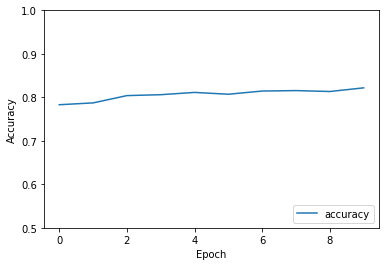

In [ ]:
# Summary
model.summary()

plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(val_ds,  test_labels, verbose=2)

loss, accuracy = model.evaluate(val_ds, verbose=2)
print("Accuracy", accuracy)


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
INFO:tensorflow:Assets written to: /tmp/tmp92zbvamm/assets
Consider rewriting this model with the Functional API.


In [ ]:
model.save('/content/saved_model/')

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
INFO:tensorflow:Assets written to: /content/model/assets
